In [1]:
import music21 as m21

# Exploring Harmonic structures
Let's approach harmony from the bottom up starting with notes, defining scales, and then start building chords and chord progressions.

To get started let's define our building blocks: the 12 notes.

In [2]:
notes = ('C','C#','D','D#','E','F','F#','G','G#','A','A#','B')
len(notes)


12

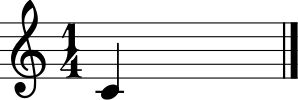

In [3]:
m21.note.Note('C').show()


## Scales
Let's use notes to build scales.

In [4]:
chromatic = m21.stream.Stream([m21.note.Note(n) for n in notes])


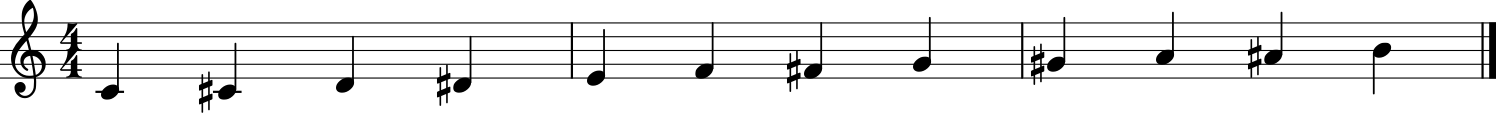

In [5]:
chromatic.show()

In [6]:
chromatic.write('midi', 'chromatic.mid')
chromatic.show('midi')

In [7]:
type(chromatic)

music21.stream.base.Stream

## Scales and keys
Scales are typically associated with keys. Let's look at the C major scale.

In [8]:
def scale_as_stream(scale):
    return m21.stream.Stream([m21.note.Note(p) for p in scale.pitches])
    

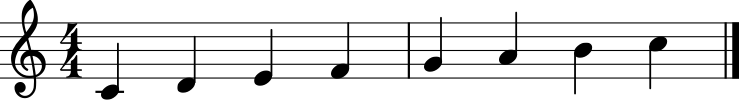

In [9]:
C = m21.key.Key('C')
Csc = scale_as_stream(C)
Csc.show()

In [10]:
m21.stream.Stream([m21.note.Note(p) for p in C.pitches]).write('midi', 'C-major.mid')

'C-major.mid'

The same notes define other scales depending on where the scale starts, for example if we start on A we get a minor scale.

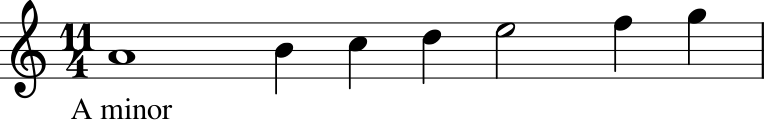

In [11]:
A = C.getScale('minor')
A.show()

In [12]:
C.mode

'major'

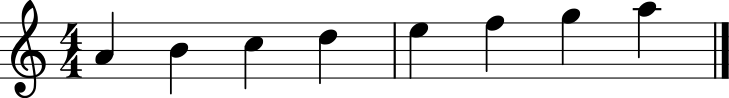

In [13]:
Asc = scale_as_stream(A)
Asc.write('midi','A-minor.mid')
Asc.show()

We can also create a scale using classes from the scale package.

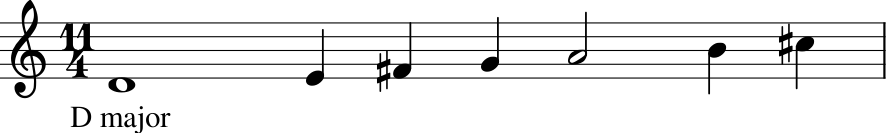

In [14]:
D = m21.scale.MajorScale('d')
D.show()

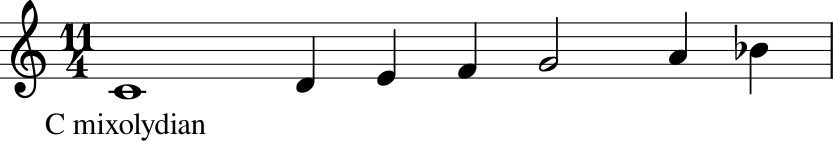

In [15]:
cml = m21.scale.MixolydianScale('c')
cml.show()

These scales can also be converted into a stream and thus saves as `midi`.

In [16]:
scale_as_stream(cml).show('midi')

In [17]:
rn = cml.romanNumeral(7)
str(rn.root())

'B-4'

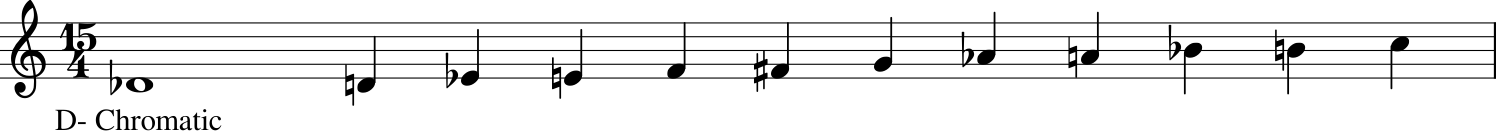

In [18]:
m21.scale.ChromaticScale('d-').show()

In [19]:
cs = m21.scale.ChromaticScale('C')
cs.pitches

[<music21.pitch.Pitch C4>,
 <music21.pitch.Pitch C#4>,
 <music21.pitch.Pitch D4>,
 <music21.pitch.Pitch E-4>,
 <music21.pitch.Pitch E4>,
 <music21.pitch.Pitch F4>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch G4>,
 <music21.pitch.Pitch A-4>,
 <music21.pitch.Pitch A4>,
 <music21.pitch.Pitch B-4>,
 <music21.pitch.Pitch B4>,
 <music21.pitch.Pitch C5>]

In [20]:
for i in [0, 2, 4, 5, 7, 9, 10]:
    print(cs.pitches[i].name)

C
D
E
F
G
A
B-


In [ ]:
hs = m21.scale.HarmonicMinorScale('E-')
hs.pitches

In [ ]:
Bo = m21.scale.OctatonicScale('B')
Bo.pitches

In [ ]:
cs = m21.scale.ChromaticScale('C')
cs.pitches

In [ ]:
for i in [0, 2, 4, 5, 7, 9, 10]:
    print(cs.pitches[i].name)

In [ ]:
hs = m21.scale.HarmonicMinorScale('E-')
hs.pitches

## Using MusicIR Scale class
MusicIR Scale class provides  different API, that make is easier to generate new scales and analyse them.

In [3]:
from musicir.harmony import scale
from musicir.harmony.scale import Scale

In [4]:
s = Scale("F", acc="#", mode="RagAsawari")
s

F# RagAsawari

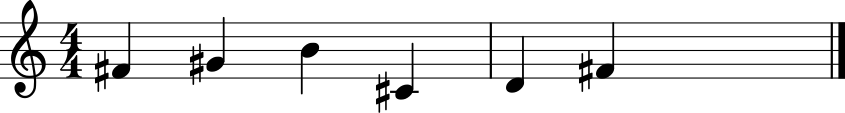

In [5]:
s.stream.show()

MusicIR supports more scale types than Music21

In [6]:
c6 = Scale("G", acc="", mode="Chinese 6 Pentatonic")
c6

G Chinese 6 Pentatonic

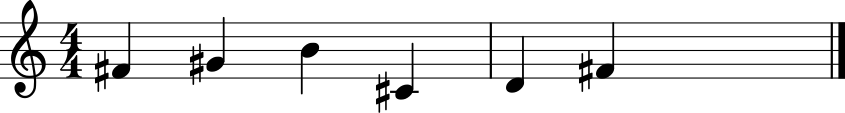

In [7]:
s.stream.show()

MusicIR supports more scale types than Music21

In [8]:
c6 = Scale("G", acc="", mode="Chinese 6 Pentatonic")
c6

G Chinese 6 Pentatonic

In [9]:
c6.get_notes()

['G', 'B', 'C#', 'D', 'F#']

## Generating  MIDI Scales

In [13]:
for scl_name in scale.m21_scales:
    for n in notes:
        print(f"saving {n} {scl_name}...")
        scl = Scale(tonic=n, mode=scl_name)
        scl.stream.write('midi', f'{n}_{scl_name}.mid')

saving C Major...
saving C# Major...
saving D Major...
saving D# Major...
saving E Major...
saving F Major...
saving F# Major...
saving G Major...
saving G# Major...
saving A Major...
saving A# Major...
saving B Major...
saving C Minor...
saving C# Minor...
saving D Minor...
saving D# Minor...
saving E Minor...
saving F Minor...
saving F# Minor...
saving G Minor...
saving G# Minor...
saving A Minor...
saving A# Minor...
saving B Minor...
saving C Melodic Minor...
saving C# Melodic Minor...
saving D Melodic Minor...
saving D# Melodic Minor...
saving E Melodic Minor...
saving F Melodic Minor...
saving F# Melodic Minor...
saving G Melodic Minor...
saving G# Melodic Minor...
saving A Melodic Minor...
saving A# Melodic Minor...
saving B Melodic Minor...
saving C Harmonic Minor...
saving C# Harmonic Minor...
saving D Harmonic Minor...
saving D# Harmonic Minor...
saving E Harmonic Minor...
saving F Harmonic Minor...
saving F# Harmonic Minor...
saving G Harmonic Minor...
saving G# Harmonic Min

In [14]:
!ls *.mid

 A#_Chromatic.mid                   D#_Lydian.mid
 A_Chromatic.mid                    D_Lydian.mid
 A#_Dorian.mid                      D#_Major.mid
 A_Dorian.mid                       D_Major.mid
'A#_Harmonic Minor.mid'            'D#_Melodic Minor.mid'
'A_Harmonic Minor.mid'             'D_Melodic Minor.mid'
 A#_Hypoaeolian.mid                 D#_Minor.mid
 A_Hypoaeolian.mid                  D_Minor.mid
 A#_Hypodorian.mid                  D#_Mixolydian.mid
 A_Hypodorian.mid                   D_Mixolydian.mid
 A#_Hypolocrian.mid                 D#_Octatonic.mid
 A_Hypolocrian.mid                  D_Octatonic.mid
 A#_Hypolydian.mid                  D#_Phrygian.mid
 A_Hypolydian.mid                   D_Phrygian.mid
 A#_Hypomixolydian.mid              D#_RagAsawari.mid
 A_Hypomixolydian.mid               D_RagAsawari.mid
 A#_Hypophrygian.mid                D#_RagMarwa.mid
 A_Hypophrygian.mid                 D_RagMarwa.mid
 A#_Locrian.mid                    'D#_Weighted Hexatonic Blues.mid

### Listing the Accidents of a Scale

In [33]:
fsm = Scale('F', acc='',mode='Major')
fsm = fsm.as_scale()
fsm

<music21.scale.ConcreteScale F Concrete>

In [34]:
for i in range(1,9):
    d = fsm.romanNumeral(i)
    print(f"{d.scaleDegree}: {fsm.pitchFromDegree(i)}")

1: F4
2: G4
3: A4
4: B-4
5: C5
6: D5
7: E5
7: F4


In [28]:
d.scaleDegree

7